A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [14]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df1 = pd.read_csv("flights2022.csv")
df2 = pd.read_csv("flights_weather2022.csv")
df1.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


In [15]:
# Create route column
df1["route"] = df1["origin"] + "-" + df1["dest"]

In [16]:

# Calculate mean departure delay and number of canceled flights for each unique flight route
routes_delays_cancels = df1.groupby("route", as_index=False).agg(mean_dep_delay=("dep_delay", "mean"), total_cancellations=("dep_time", lambda x: x.isna().sum()))
routes_delays_cancels.head()

,route,mean_dep_delay,total_cancellations
0,PDX-ABQ,1.098039,2
1,PDX-ANC,4.748936,4
2,PDX-ATL,7.020979,13
3,PDX-AUS,5.435374,5
4,PDX-BOI,5.136430,7


In [17]:
# Find mean departure delays and total cancellations by airline
airlines_delays_cancels = df1.groupby("airline", as_index=False).agg(mean_dep_delay=("dep_delay", "mean"), total_cancellations=("dep_time", lambda x: x.isna().sum()))
airlines_delays_cancels.head()

,airline,mean_dep_delay,total_cancellations
0,Alaska Airlines Inc.,6.739282,1300
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
3,Delta Air Lines Inc.,10.648634,383
4,Frontier Airlines Inc.,14.355856,12


In [18]:
# Identify routes with the highest number of cancellations
top_routes_by_cancellations = routes_delays_cancels.sort_values("total_cancellations", ascending=False)[:9]

In [19]:
# Identify airlines with the highest mean departure delay
top_airlines_by_delay = airlines_delays_cancels.sort_values("mean_dep_delay", ascending=False)[:9]

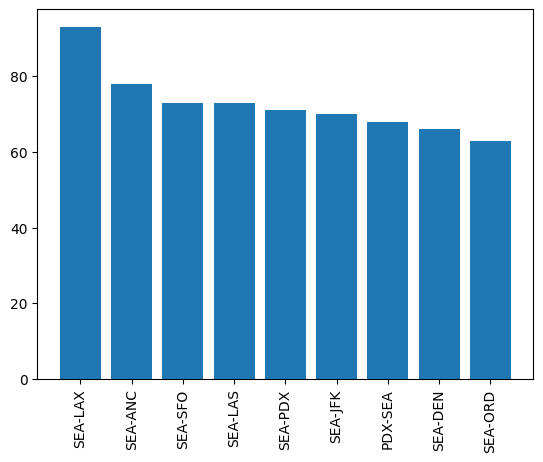

In [20]:
# Create a bar graph for highest number of cancellations
top9_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations["route"], top_routes_by_cancellations["total_cancellations"])
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)
plt.show()
plt.close()

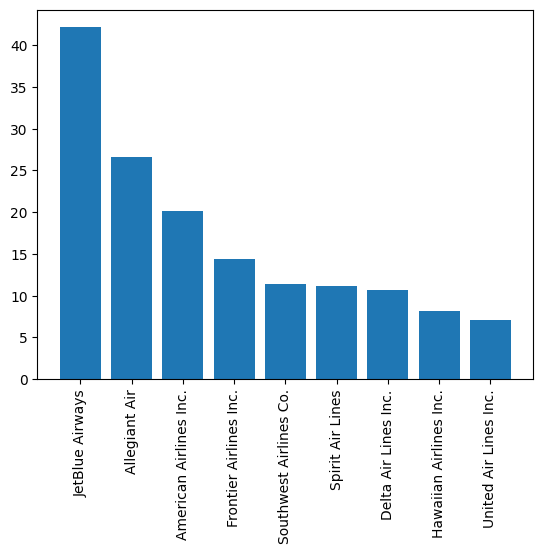

In [21]:
# Create a bar graph for highest mean depearture delay
top9_airline_delays_bar, ax = plt.subplots()
ax.bar(top_airlines_by_delay["airline"], top_airlines_by_delay["mean_dep_delay"])
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)
plt.show()
plt.close()

In [22]:
# Are departure delays impacted by 10+ mph winds from each airport
df2["group"] = df2["wind_gust"].apply(lambda x: ">= 10mph" if x >= 10 else "< 10 mph")
wind_grouped_data = df2.groupby(["group", "origin"]).agg(mean_dep_delay=("dep_delay", "mean"))

print(wind_grouped_data)

                 mean_dep_delay
group    origin                
< 10 mph PDX           6.686966
         SEA           7.857595
>= 10mph PDX           9.147024
         SEA           9.231060
